<a href="https://colab.research.google.com/github/JefNtungila/Geoproject/blob/master/Mapping_Hostels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yandex-geocoder

In [2]:
 pip uninstall matplotlib

Uninstalling matplotlib-3.1.0:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/matplotlib-3.1.0-py3.6-nspkg.pth
    /usr/local/lib/python3.6/dist-packages/matplotlib-3.1.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/matplotlib/*
    /usr/local/lib/python3.6/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.6/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.6/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.6/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.6/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.6/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.1.0


In [3]:
pip install -U matplotlib

  Using cached https://files.pythonhosted.org/packages/da/83/d989ee20c78117c737ab40e0318ea221f1aed4e3f5a40b4f93541b369b93/matplotlib-3.1.0-cp36-cp36m-manylinux1_x86_64.whl
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [4]:
pip install geopandas

In [5]:
pip install descartes

In [0]:
import pandas as pd
from yandex_geocoder import Client
import numpy as np


In [0]:
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [0]:
hostel_data = pd.read_excel('https://github.com/JefNtungila/Geoproject/blob/master/Data%20visualisation.xlsx?raw=true')

In [9]:
hostel_data.head(1)

,Unnamed: 0,Unnamed: 1,City,Hostel Name,Email,Facebook,Instagram,Number,Address
0,NaN,1.0,Ayutthaya,Early Bird Hostel Ayutthaya,earlybirdhostel@gmail.com,https://www.facebook.com/earlybirdhostelayutth...,NaN,=+66 88 676 2525,ตำบล หัวรอ อำเภอ พระนครศรีอยุธยา พระนครศรีอยุธ...


In [10]:
hostel_data.columns.values

array(['Unnamed: 0', 'Unnamed: 1', 'City', 'Hostel Name', 'Email',
       'Facebook', 'Instagram', 'Number', 'Address'], dtype=object)

In [11]:
hostel_data = hostel_data.drop(['Unnamed: 0','Unnamed: 1'], axis = 1)
hostel_data.head(1)

,City,Hostel Name,Email,Facebook,Instagram,Number,Address
0,Ayutthaya,Early Bird Hostel Ayutthaya,earlybirdhostel@gmail.com,https://www.facebook.com/earlybirdhostelayutth...,NaN,=+66 88 676 2525,ตำบล หัวรอ อำเภอ พระนครศรีอยุธยา พระนครศรีอยุธ...


In [0]:
x = hostel_data['Address'].tolist()
x;

In [13]:
%%time 

coord_list = []

for item in x:
  try:
    a = Client.coordinates(item)
    coord_list.append(a)
  except:
    coord_list.append('Coord NA')

coord_list

CPU times: user 34.2 s, sys: 2.56 s, total: 36.8 s
Wall time: 27min 58s


In [0]:
coord_list;

In [0]:
dic =	{
  'Coord NA': (np.NaN,np.NaN)}

updated_coord_list= [ dic.get(item,item) for item in coord_list] 
updated_coord_list;

In [0]:
hostel_data[['Latitude','Longitude']] = pd.DataFrame(updated_coord_list)

In [0]:
hostel_data[['Latitude','Longitude']] = hostel_data[['Latitude','Longitude']].astype(float)
hostel_data[['Latitude','Longitude']] = hostel_data[['Latitude','Longitude']].fillna(method='ffill')

##Thailand

In [0]:
hostel_data_thailand = hostel_data.head(1225)


In [84]:
hostel_data_thailand.tail(1)

,City,Hostel Name,Email,Facebook,Instagram,Number,Address,Latitude,Longitude
1224,Ambarawa,Crown Guest House,NaN,NaN,NaN,NaN,"Jl. Kartini Bawen No.7, Mustika, Bawen, Semara...",101.307704,16.378309


In [0]:
Thailand = gpd.GeoDataFrame.from_file('http://biogeo.ucdavis.edu/data/diva/adm/THA_adm.zip')

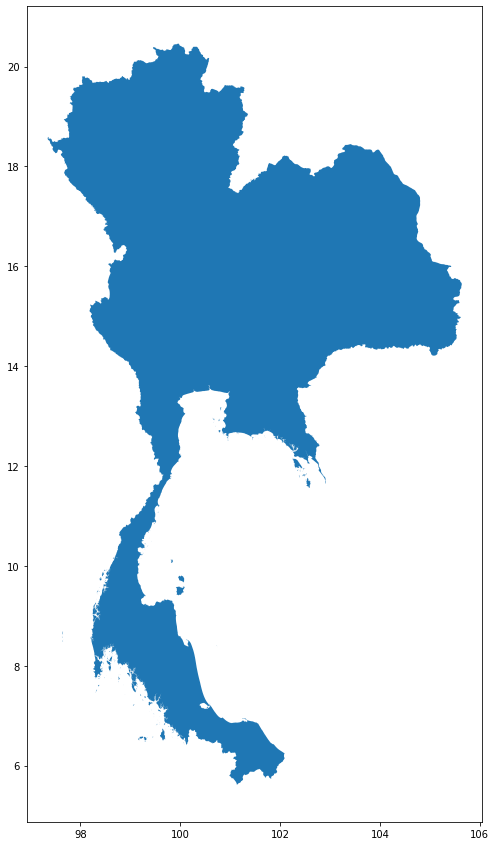

In [86]:
fig, ax = plt.subplots (figsize = (25,15))
Thailand.plot(ax=ax)

In [0]:
hostel_points = hostel_data_thailand[['Latitude', 'Longitude']].apply(lambda row:
              Point(row["Latitude"], row["Longitude"]), axis=1)

geo_hostels = gpd.GeoDataFrame({"geometry": hostel_points,
			"Hostel_Names": hostel_data_thailand["Hostel Name"]})

In [0]:
Thailand.crs = {'init': 'epsg:4326'}
geo_hostels.crs = {'init': 'epsg:4326'}

Text(0.5, 1, 'Hostels in Thailand')

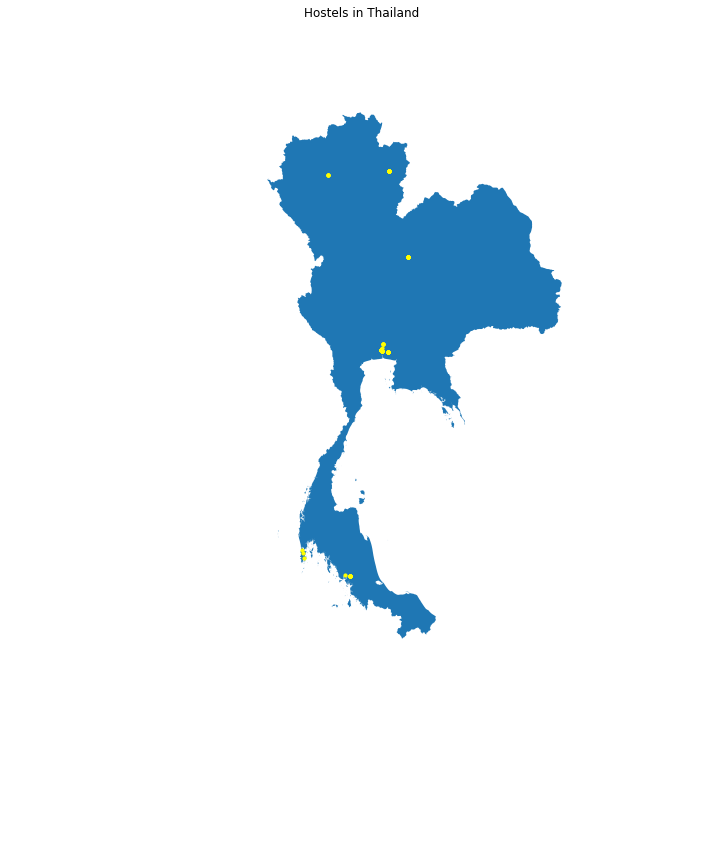

In [95]:
fig, ax = plt.subplots (figsize = (25,15))
base = Thailand.plot(ax=ax)
geo_hostels.plot(ax=ax, marker="o",
            markersize=10,
              alpha=1, color = 'yellow')
_ = ax.axis('off')
plt.xlim(90,110)
plt.ylim(0,23)
ax.set_title("Hostels in Thailand")